## Theory of Decision Trees

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.precision',3)

Data
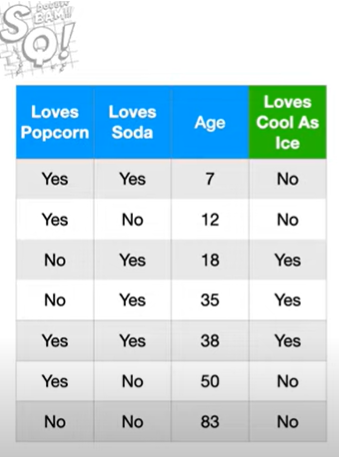

In [ ]:
df = pd.DataFrame({
    "Likes Popcorn" : [1,1,0,0,1,1,0],
    "Loves Soda": [1,0,1,1,1,0,0],
    "Age": [7,12,18,35,38,50,83],
    "Loves Cool": [0,0,1,1,1,0,0]
})
df

In [ ]:
totalGiniDict = {}

In [ ]:
# function to calculate gini
def totalGini(df,conditionColumn,targetColumn):
    dftemp = df.copy()
    df_childLeft = dftemp[dftemp[conditionColumn] == True]
    df_childRight = dftemp[dftemp[conditionColumn] == False]

    p_true_left = df_childLeft[df_childLeft[targetColumn] == 1][targetColumn].count() / len(df_childLeft)
    p_false_left = df_childLeft[df_childLeft[targetColumn] == 0][targetColumn].count() / len(df_childLeft)
    gini_left = 1- p_true_left**2 - p_false_left**2

    p_true_right = df_childRight[df_childRight[targetColumn] == 1][targetColumn].count() / len(df_childRight)
    p_false_right = df_childRight[df_childRight[targetColumn] == 0][targetColumn].count() / len(df_childRight)
    gini_right = 1- p_true_right**2 - p_false_right**2

    gini = (len(df_childLeft) * gini_left + len(df_childRight)*gini_right)/(len(dftemp))
    return gini

In [ ]:
conditionColumn = "Likes Popcorn"
targetColumn = 'Loves Cool'

totalGiniDict[conditionColumn] = totalGini(df,conditionColumn,targetColumn)
totalGiniDict


In [ ]:
conditionColumn = "Loves Soda"
targetColumn = 'Loves Cool'

totalGiniDict[conditionColumn] = totalGini(df,conditionColumn,targetColumn)
totalGiniDict

In [ ]:
conditionColumn = "Age <= 9.5"
df["Age <= 9.5"] = df['Age'] <= 9.5
targetColumn = 'Loves Cool'

totalGiniDict[conditionColumn] = totalGini(df,conditionColumn,targetColumn)
totalGiniDict

In [ ]:
conditionColumn = "Age <= 20"
df["Age <= 20"] = df['Age'] <= 20
targetColumn = 'Loves Cool'

totalGiniDict[conditionColumn] = totalGini(df,conditionColumn,targetColumn)
totalGiniDict

In [ ]:
conditionColumn = "Age <= 26.5"
df["Age <= 26.5"] = df['Age'] <= 26.5
targetColumn = 'Loves Cool'

totalGiniDict[conditionColumn] = totalGini(df,conditionColumn,targetColumn)
totalGiniDict

In [ ]:
conditionColumn = "Age <= 36.5"
df["Age <= 36.5"] = df['Age'] <= 36.5
targetColumn = 'Loves Cool'

totalGiniDict[conditionColumn] = totalGini(df,conditionColumn,targetColumn)
totalGiniDict

In [ ]:
conditionColumn = "Age <= 44"
df["Age <= 44"] = df['Age'] <= 44
targetColumn = 'Loves Cool'

totalGiniDict[conditionColumn] = totalGini(df,conditionColumn,targetColumn)
totalGiniDict

In [ ]:
conditionColumn = "Age <= 66.5"
df["Age <= 66.5"] = df['Age'] <= 66.5
targetColumn = 'Loves Cool'

totalGiniDict[conditionColumn] = totalGini(df,conditionColumn,targetColumn)
totalGiniDict

Root node should be soda

In [ ]:
df

# Decision Trees with Sklearn on Toy data

In [ ]:
import sklearn.tree as tree

x = np.array(df[['Likes Popcorn', 'Loves Soda','Age']])
y = np.array(df['Loves Cool'])

tr = tree.DecisionTreeClassifier()

tr.fit(x,y)

tree.plot_tree(tr,feature_names=['Likes Popcorn', 'Loves Soda','Age'])

# TODO: Decision Trees with SKlearn on Bigger data

## Problem: Adult Data set

In [ ]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [ ]:
df = pd.read_csv(DATA_PATH + "adult_train.csv", sep=";")
df.tail()

In [ ]:
df.drop(columns=['Workclass', 'Occupation', 'Country'],inplace=True)
df.info()

In [ ]:
df['Target'].unique()

In [ ]:
df['TargetNew'] = df['Target'].map({' <=50K':0, ' >50K':1 })
df

In [ ]:
import sklearn.tree as tree

featureNames = ['Age', 'Education_Num','Hours_per_week']

x = np.array(df[featureNames])
y = np.array(df['TargetNew'])

tr = tree.DecisionTreeClassifier(max_depth=18)

tr.fit(x,y)

tree.plot_tree(tr,feature_names=featureNames)

In [ ]:
y_predict = tr.predict(x)





In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
confusion_matrix(y,y_predict)

In [ ]:
accuracy_score(y,y_predict)

# TODO Parameter tuning with Sklearn

In [94]:
from sklearn.model_selection import GridSearchCV

max_depth=[6, 12, 18]
max_leaf_nodes=[8,16,24,32,40]
min_impurity_decrease=[0.0001]
param_grid = {"max_depth": max_depth, 'max_leaf_nodes':max_leaf_nodes, 'min_impurity_decrease':min_impurity_decrease}

dt = tree.DecisionTreeClassifier()
gs = GridSearchCV(estimator=dt, param_grid=param_grid)
result = gs.fit(x, y)

In [95]:
#see results details
gs.cv_results_

{'mean_fit_time': array([0.01665359, 0.01043415, 0.01076336, 0.01051855, 0.01077938,
        0.00740933, 0.01020331, 0.010115  , 0.01139741, 0.01106901,
        0.00799441, 0.0100172 , 0.01032076, 0.01146455, 0.01048207]),
 'std_fit_time': array([0.00608787, 0.00143099, 0.00123248, 0.00104153, 0.00074699,
        0.00080206, 0.00147898, 0.00102573, 0.00184552, 0.00211052,
        0.00109601, 0.00128223, 0.001358  , 0.00109565, 0.0004266 ]),
 'mean_score_time': array([0.0044035 , 0.00100546, 0.00119963, 0.0012032 , 0.00120645,
        0.00110703, 0.0015934 , 0.00100055, 0.00140333, 0.00152087,
        0.00110693, 0.00140252, 0.00141358, 0.0012845 , 0.00122004]),
 'std_score_time': array([2.25292055e-03, 1.90376900e-06, 3.89863314e-04, 3.97850008e-04,
        3.96002434e-04, 2.03677765e-04, 1.19004907e-03, 4.48226929e-06,
        4.89522220e-04, 4.89428990e-04, 2.01617408e-04, 4.88600975e-04,
        4.79950943e-04, 5.48481112e-04, 4.00924399e-04]),
 'param_max_depth': masked_array(data=

In [96]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=40,
                       min_impurity_decrease=0.0001)

In [97]:
y_predict = gs.predict(x)
accuracy_score(y,y_predict)

0.8027087620159086

[Text(0.4725, 0.9444444444444444, 'x[1] <= 12.5\ngini = 0.366\nsamples = 32561\nvalue = [24720, 7841]'),
 Text(0.2275, 0.8333333333333334, 'x[0] <= 33.5\ngini = 0.27\nsamples = 24494\nvalue = [20562, 3932]'),
 Text(0.09, 0.7222222222222222, 'x[0] <= 26.5\ngini = 0.11\nsamples = 10653\nvalue = [10031, 622]'),
 Text(0.04, 0.6111111111111112, 'x[0] <= 23.5\ngini = 0.035\nsamples = 6238\nvalue = [6128, 110]'),
 Text(0.02, 0.5, 'gini = 0.01\nsamples = 4483\nvalue = [4460, 23]'),
 Text(0.06, 0.5, 'gini = 0.094\nsamples = 1755\nvalue = [1668, 87]'),
 Text(0.14, 0.6111111111111112, 'x[2] <= 49.5\ngini = 0.205\nsamples = 4415\nvalue = [3903, 512]'),
 Text(0.1, 0.5, 'x[1] <= 8.5\ngini = 0.173\nsamples = 3582\nvalue = [3240, 342]'),
 Text(0.08, 0.3888888888888889, 'gini = 0.055\nsamples = 533\nvalue = [518, 15]'),
 Text(0.12, 0.3888888888888889, 'gini = 0.191\nsamples = 3049\nvalue = [2722, 327]'),
 Text(0.18, 0.5, 'x[0] <= 29.5\ngini = 0.325\nsamples = 833\nvalue = [663, 170]'),
 Text(0.16, 0.38

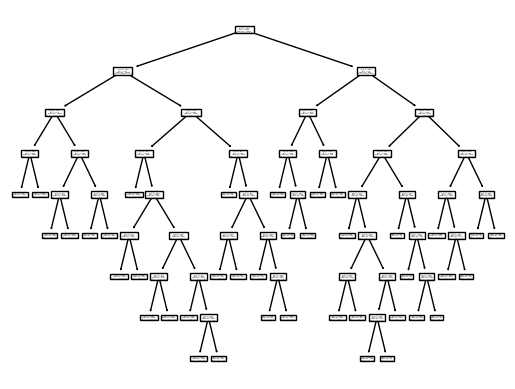

In [98]:
tree.plot_tree(gs.best_estimator_)